In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yVe04ntlzF5laESF7bPR")
project = rf.workspace("shadans-universe").project("is-fruit-detected")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to IS-FRUIT-DETECTED?-1 in yolov11:: 100%|██████████| 22744/22744 [00:04<00:00, 5177.11it/s]


In [ ]:
# Import necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Define paths
dataset_path = "/content/IS-FRUIT-DETECTED?-1/all data"
images_path = os.path.join(dataset_path, "images")
labels_path = os.path.join(dataset_path, "labels")

# Create directories for train, test, and validation splits
os.makedirs(os.path.join(dataset_path, "train", "images"), exist_ok=True)
os.makedirs(os.path.join(dataset_path, "train", "labels"), exist_ok=True)
os.makedirs(os.path.join(dataset_path, "test", "images"), exist_ok=True)
os.makedirs(os.path.join(dataset_path, "test", "labels"), exist_ok=True)
os.makedirs(os.path.join(dataset_path, "val", "images"), exist_ok=True)
os.makedirs(os.path.join(dataset_path, "val", "labels"), exist_ok=True)

# Get all image files
image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

# Split dataset into train (70%), test (10%), and validation (20%) sets randomly
train_files, temp_files = train_test_split(image_files, test_size=0.3, random_state=42)
val_files, test_files = train_test_split(temp_files, test_size=1/3, random_state=42)  # 1/3 of 30% = 10%

def move_files(files, src_images, src_labels, dst_images, dst_labels):
    for file in files:
        shutil.move(os.path.join(src_images, file), os.path.join(dst_images, file))
        shutil.move(os.path.join(src_labels, file.replace('.jpg', '.txt')), os.path.join(dst_labels, file.replace('.jpg', '.txt')))

# Move files to respective directories
move_files(train_files, images_path, labels_path, os.path.join(dataset_path, "train", "images"), os.path.join(dataset_path, "train", "labels"))
move_files(test_files, images_path, labels_path, os.path.join(dataset_path, "test", "images"), os.path.join(dataset_path, "test", "labels"))
move_files(val_files, images_path, labels_path, os.path.join(dataset_path, "val", "images"), os.path.join(dataset_path, "val", "labels"))

print("Dataset has been split into train, test, and validation sets randomly.")


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import os
HOME=os.getcwd()
print(HOME)

!pip install ultralytics
from IPython import display
display.clear_output()



In [ ]:
!pip install ultralytics
from ultralytics import YOLO
!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 5.35M/5.35M [00:00<00:00, 151MB/s]
Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/IS-FRUIT-DETECTED?-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=F

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/IS-FRUIT-DETECTED?-1/data.yaml


Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/IS-FRUIT-DETECTED?-1/all data/val/labels.cache... 2274 images, 6 backgrounds, 0 corrupt: 100% 2274/2274 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 513, len(boxes) = 4429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 143/143 [00:25<00:00,  5.57it/s]
                   all       2274       4429       0.82      0.808      0.861       0.66
                 Apple       1438       2157      0.872      0.915      0.955      0.854
                Banana        173        320      0.718      0.652      0.708      0.404
                Grapes 

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.4 source=/content/IMG-1.jpg save=True


Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/IMG-1.jpg: 640x480 3 Bananas, 42.9ms
Speed: 3.5ms preprocess, 42.9ms inference, 160.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


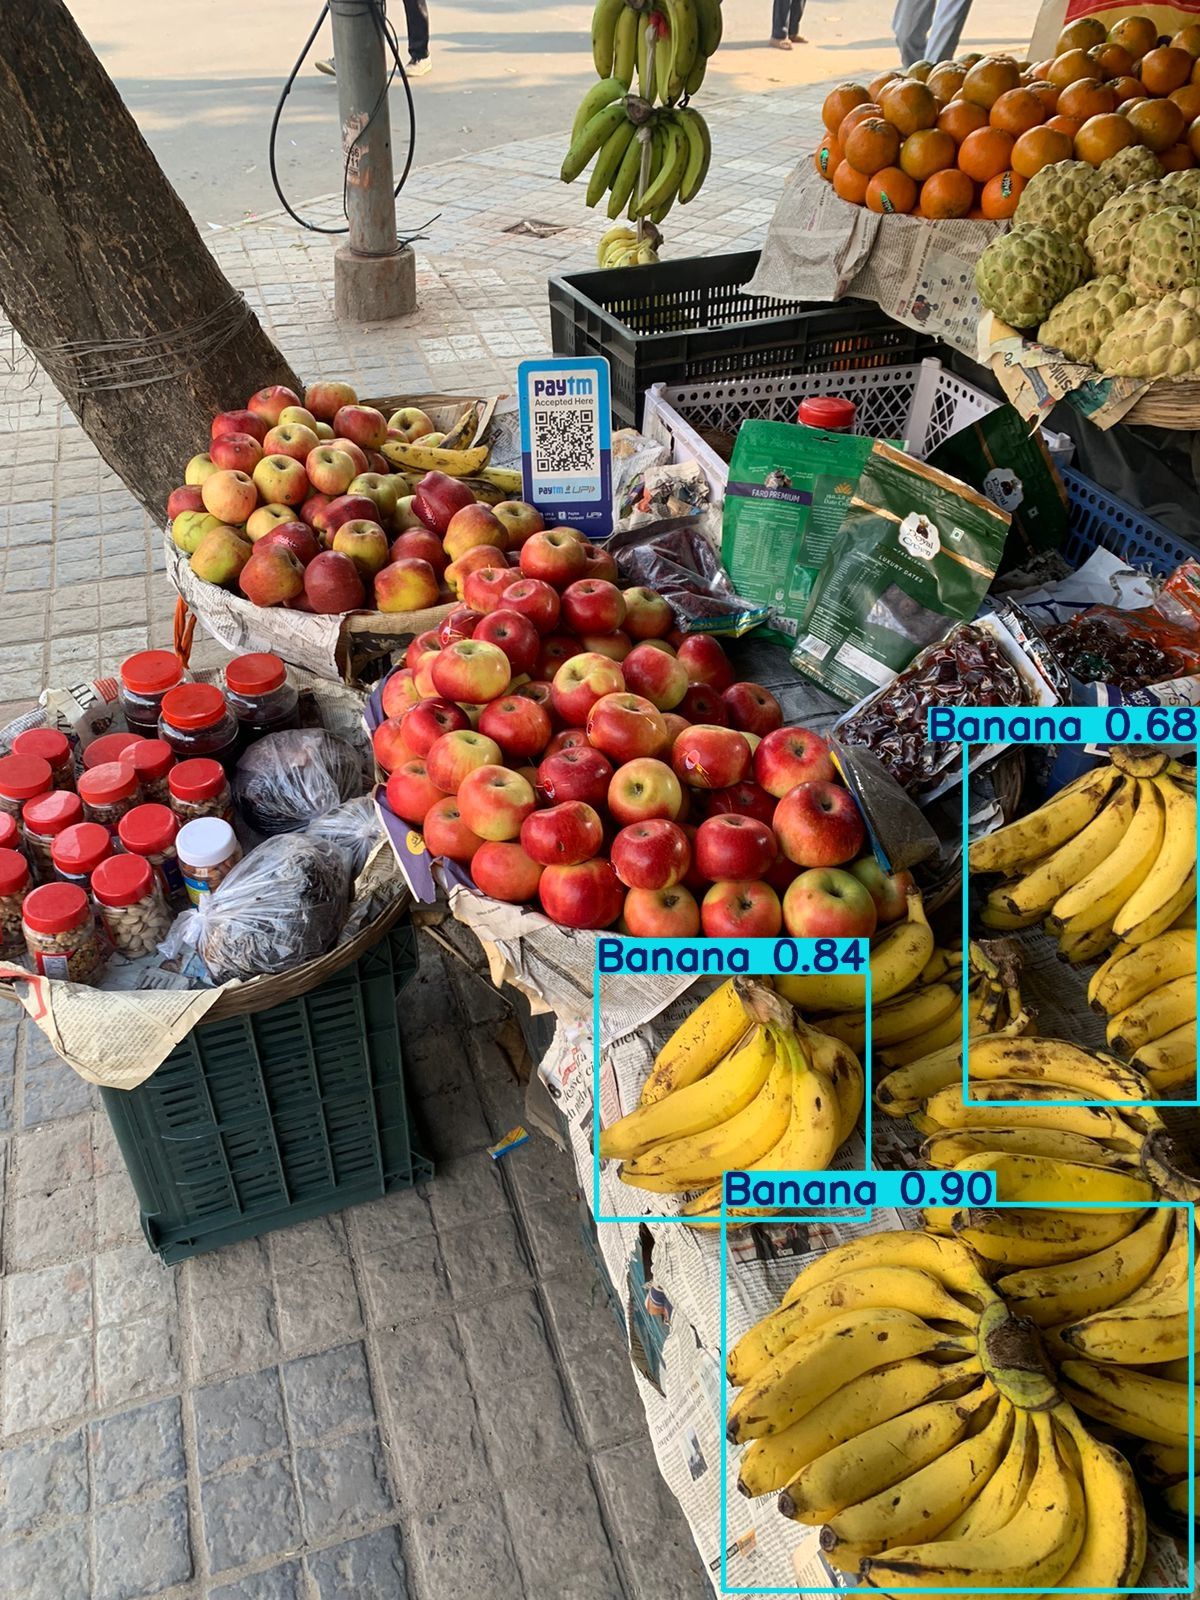

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/IMG-1.jpg'):
  display(Image(filename=image_path, width=900))
  print("\n")

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.4 source=/content/IMG-2.jpg save=True
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict2/IMG-1.jpg'):
  display(Image(filename=image_path, width=900))
  print("\n")


Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/IMG-2.jpg: 640x480 17 Apples, 3 Oranges, 48.0ms
Speed: 3.1ms preprocess, 48.0ms inference, 154.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


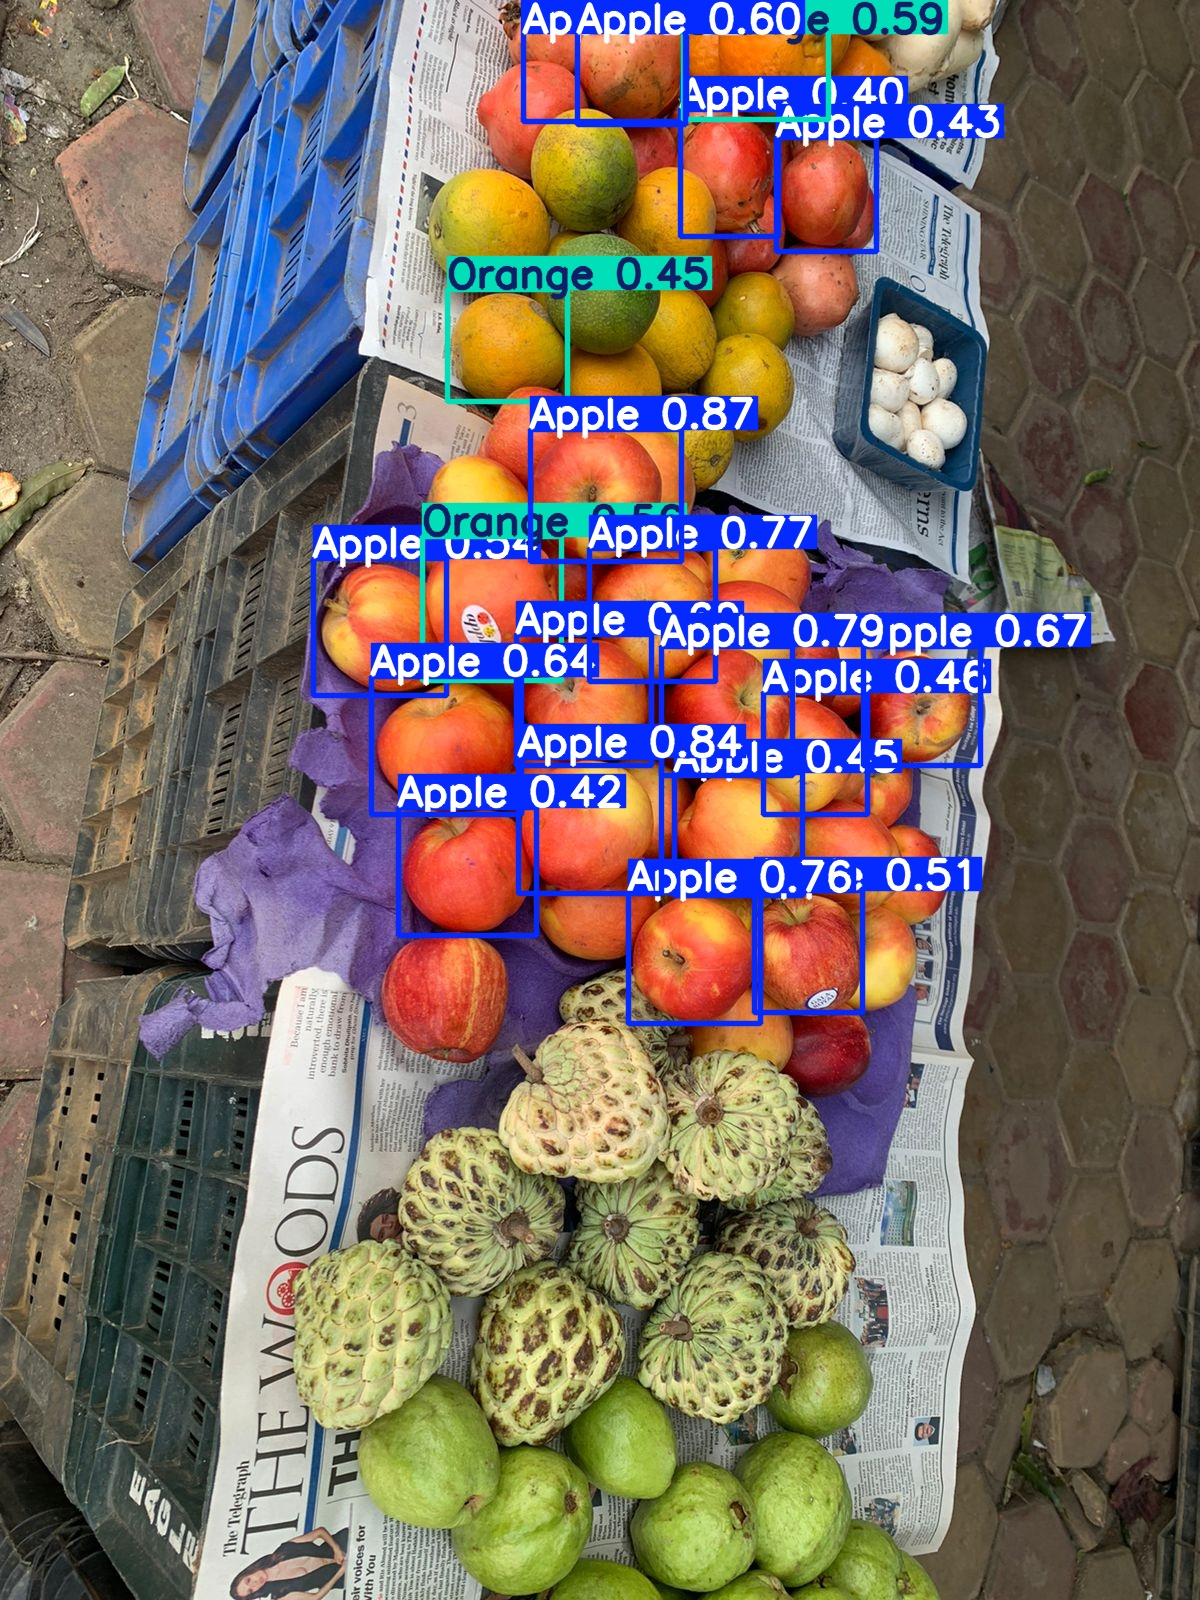

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict2/IMG-2.jpg'):
  display(Image(filename=image_path, width=900))
  print("\n")

Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/IMG-3.jpg: 640x480 8 Apples, 2 Oranges, 68.6ms
Speed: 4.4ms preprocess, 68.6ms inference, 200.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


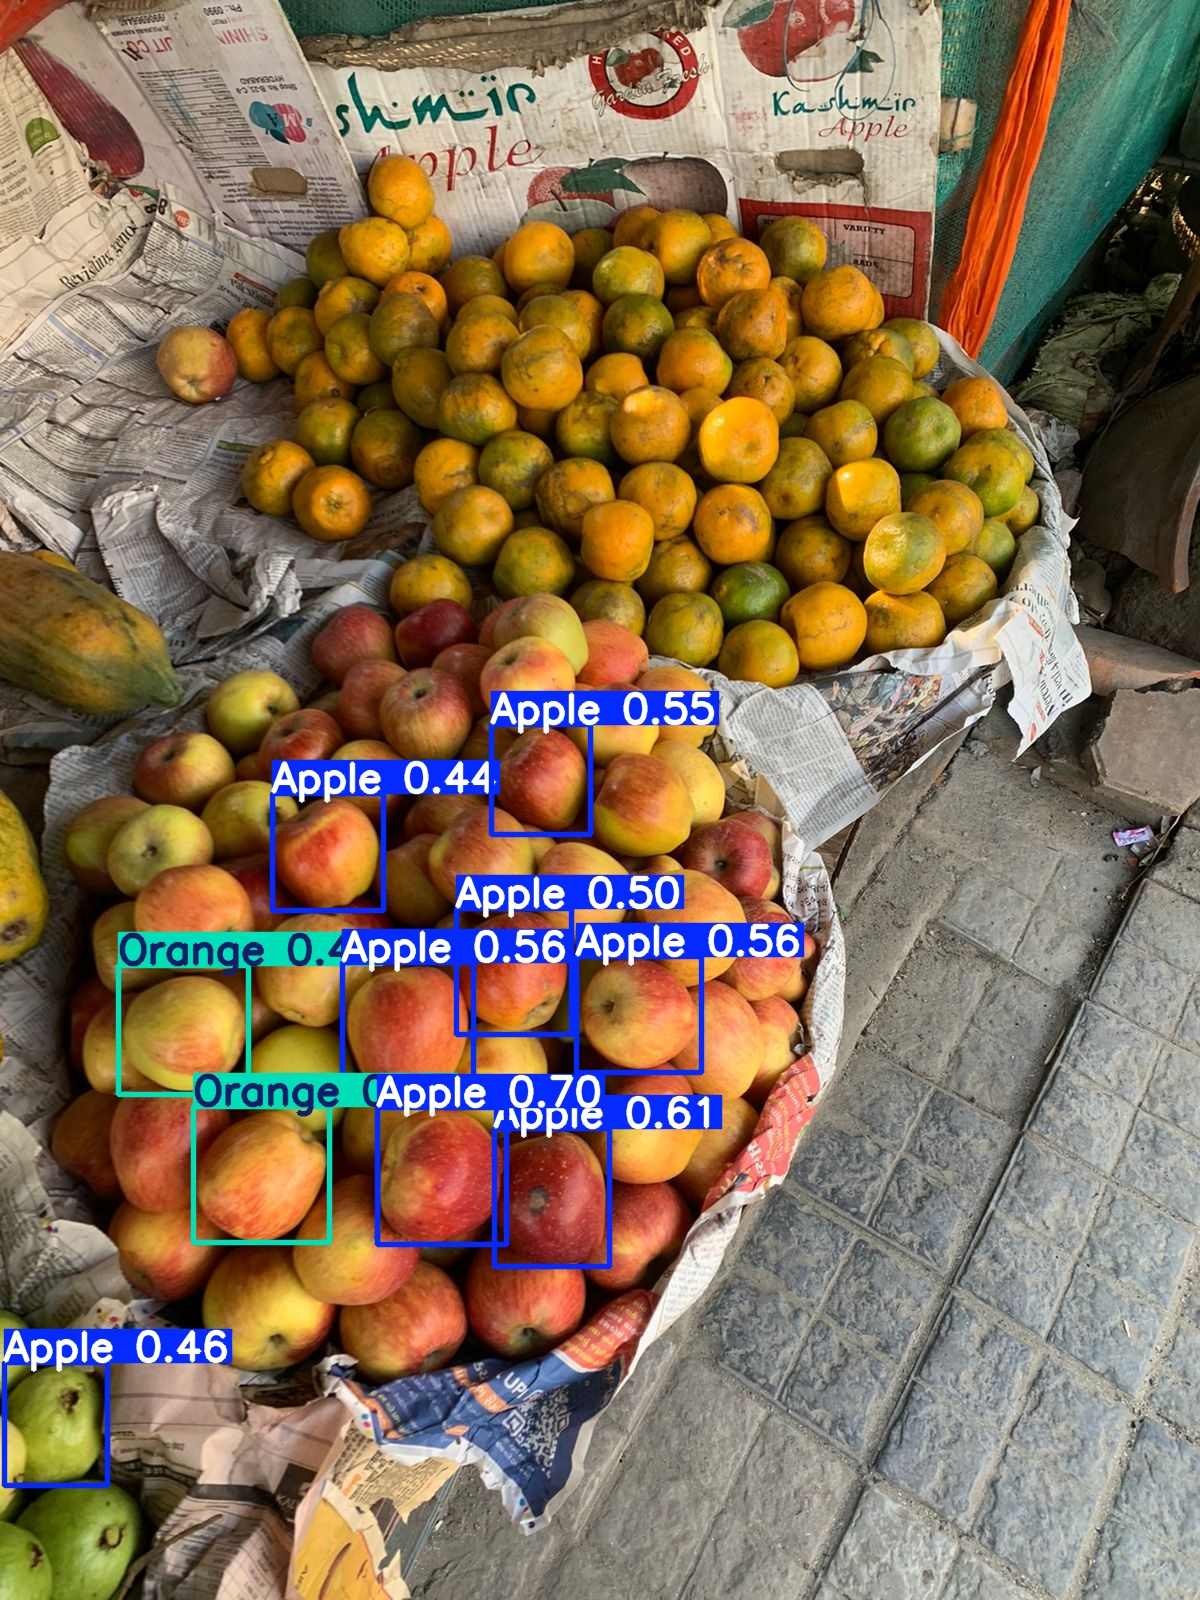

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.4 source=/content/IMG-3.jpg save=True
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict3/IMG-3.jpg'):
  display(Image(filename=image_path, width=900))
  print("\n")